In [2]:
import requests
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
def fetch_git_forks(url):
    time.sleep(2.4)
    pages = []
    res=requests.get(url,headers={'Authorization': 'token ' + 'b499684ea402d0504e021498de8a7339edf095cf', 'Accept': 'application/vnd.github.squirrel-girl-preview+json'})
    data=res.json()
    pages.append(data)
    return pages

In [4]:
user_details = pd.read_excel("File User Merge Issue Count.xlsx")
user_details.head()

,login,followers,following,public_repos,year,Merge Count,Issue Count
0,torvalds,105277,0,6,2011,43,1
1,JakeWharton,56035,12,99,2009,3175,1202
2,tj,41876,46,288,2008,125,2782
3,mojombo,21759,11,61,2007,52,21
4,gaearon,51842,171,239,2011,1661,1324


In [5]:
login_names = list(user_details.login)

In [6]:
def calculate_count(merge, users):
    if merge:
        search_query = "+is:merged&per_page=1"
    else:                                                     #Closed PR
        search_query = "+is:pr+is:closed&per_page=1"
    user_count_dic = {}
    for login_name in users:
        temp_count = 0
        url = "https://api.github.com/search/issues?q=author:"+login_name+search_query
        x = fetch_git_forks(url)
        user_count_dic[login_name] = int(x[0]['total_count'])  
    return user_count_dic

In [7]:
#user_merge_dic = calculate_count(1,top_10_login_name)
user_close_pr_dic = calculate_count(0,login_names)

In [8]:
user_details['Closed Pull Request Count'] = user_close_pr_dic.values()

In [9]:
user_details['Merge Ratio'] = user_details['Merge Count']/user_details['Closed Pull Request Count']

In [10]:
user_details.tail()

,login,followers,following,public_repos,year,Merge Count,Issue Count,Closed Pull Request Count,Merge Ratio
95,unclebob,7337,0,42,2008,1,2,3,0.333333
96,necolas,8011,28,69,2010,181,1044,263,0.688213
97,liaohuqiu,8187,228,126,2013,92,59,134,0.686567
98,PresidentObamaBot,3310,0,0,2014,0,0,0,NaN
99,hackedteam,5278,0,53,2015,0,0,0,NaN


In [11]:
user_details['Merge Ratio'] = user_details['Merge Ratio'].fillna(0)

In [12]:
user_details.tail()

,login,followers,following,public_repos,year,Merge Count,Issue Count,Closed Pull Request Count,Merge Ratio
95,unclebob,7337,0,42,2008,1,2,3,0.333333
96,necolas,8011,28,69,2010,181,1044,263,0.688213
97,liaohuqiu,8187,228,126,2013,92,59,134,0.686567
98,PresidentObamaBot,3310,0,0,2014,0,0,0,0.000000
99,hackedteam,5278,0,53,2015,0,0,0,0.000000


In [13]:
user_details.to_excel("File User PageRank attributes.xlsx", index=False)

In [14]:
user_details.head()

,login,followers,following,public_repos,year,Merge Count,Issue Count,Closed Pull Request Count,Merge Ratio
0,torvalds,105277,0,6,2011,43,1,50,0.860000
1,JakeWharton,56035,12,99,2009,3175,1202,3358,0.945503
2,tj,41876,46,288,2008,125,2782,166,0.753012
3,mojombo,21759,11,61,2007,52,21,62,0.838710
4,gaearon,51842,171,239,2011,1661,1324,2005,0.828429


## Pearson's correlation coefficient 

In [15]:
pearson_df = pd.DataFrame(columns=['Followers', 'public_repos', 'Merge Count', 'Issue Count'], index=['Followers', 'public_repos', 'Merge Count', 'Issue Count'])

pearson_df['Issue Count']['Issue Count']=1
pearson_df['public_repos']['public_repos']=1
pearson_df['Followers']['Followers']=1
pearson_df['Merge Count']['Merge Count']=1
pearson_df

### Merge Count

pearson_df['Followers']['Merge Count'] = user_details['Merge Count'].corr(user_details['followers'])

pearson_df['Merge Count']['Issue Count'] = user_details['Merge Count'].corr(user_details['Issue Count'])

user_details['Merge Count'].corr(user_details['Closed Pull Request Count'])

pearson_df['public_repos']['Merge Count'] = user_details['Merge Count'].corr(user_details['public_repos'])

user_details['Merge Count'].corr(user_details['year'])

### Followers

user_details['followers'].corr(user_details['Closed Pull Request Count'])

pearson_df['Followers']['public_repos'] = user_details['followers'].corr(user_details['public_repos'])

user_details['followers'].corr(user_details['year'])

pearson_df['Followers']['Issue Count'] = user_details['followers'].corr(user_details['Issue Count'])

### Issue Count

user_details['Issue Count'].corr(user_details['Closed Pull Request Count'])

user_details['Issue Count'].corr(user_details['year'])

pearson_df['public_repos']['Issue Count'] =user_details['Issue Count'].corr(user_details['public_repos'])

### public_repos

user_details['public_repos'].corr(user_details['year'])

user_details['public_repos'].corr(user_details['Closed Pull Request Count'])

### Closed Pull request

user_details['Closed Pull Request Count'].corr(user_details['year'])

user_details['year'].corr(user_details['Merge Ratio'])

pearson_df = pearson_df.fillna(' ')

## Pearson's Coefficient Correlation Matrix

pearson_df

,Followers,public_repos,Merge Count,Issue Count
Followers,1.000000,,,
public_repos,-0.038099,1,,
Merge Count,0.271839,0.00602536,1,
Issue Count,0.235138,0.0587602,0.427099,1


In [16]:
user_details.sort_values(('Merge Count'), ascending=False).head(10)

,login,followers,following,public_repos,year,Merge Count,Issue Count,Closed Pull Request Count,Merge Ratio
1,JakeWharton,56035,12,99,2009,3175,1202,3358,0.945503
18,fabpot,9910,0,41,2009,2016,331,2281,0.883823
4,gaearon,51842,171,239,2011,1661,1324,2005,0.828429
5,paulirish,28566,254,271,2008,1153,1361,1309,0.880825
71,feross,9473,245,146,2009,1075,1523,1160,0.926724
9,sindresorhus,36142,50,1026,2009,1062,2769,1255,0.846215
31,ry,18580,35,32,2008,1008,720,1165,0.865236
38,mitsuhiko,13919,22,221,2008,812,464,921,0.881650
86,mitchellh,7000,0,100,2008,733,400,775,0.945806
15,taylorotwell,17120,0,12,2010,660,83,685,0.963504


## Plots

## Graph for Research Report

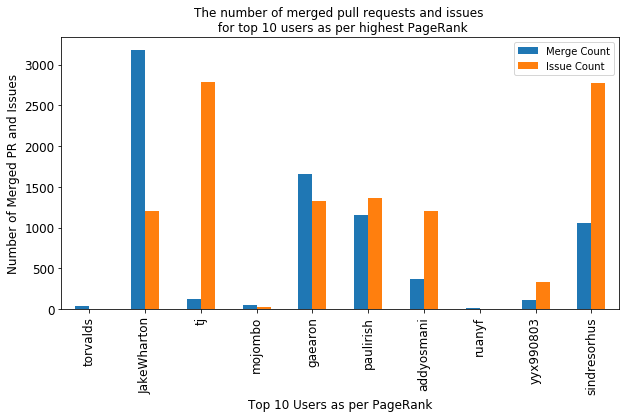

In [17]:
ax = user_details.head(10)[['Merge Count','Issue Count']].plot(kind='bar', title ="The number of merged pull requests and issues \n for top 10 users as per highest PageRank", figsize=(10, 5), legend=True, fontsize=12, stacked=False)
ax.set_xticklabels(user_details.head(10)['login'])
ax.set_xlabel("Top 10 Users as per PageRank", fontsize=12)
ax.set_ylabel("Number of Merged PR and Issues", fontsize=12)
plt.savefig('mergeissuepr.png', format='png', dpi=600,bbox_inches = 'tight')
plt.show()

In [18]:
user_details['MergedIssue'] = user_details['Merge Count'] + user_details['Issue Count']
sorted_by_merge_issue_df = user_details.sort_values(['MergedIssue'], ascending=False)
sorted_by_merge_issue_df.to_excel('File MergedIssue user.xlsx', index=False)
sorted_by_merge_issue_df = pd.read_excel('File MergedIssue user.xlsx')
sorted_by_merge_issue_df.head()

,login,followers,following,public_repos,year,Merge Count,Issue Count,Closed Pull Request Count,Merge Ratio,MergedIssue
0,JakeWharton,56035,12,99,2009,3175,1202,3358,0.945503,4377
1,hadley,17626,6,228,2008,390,3887,440,0.886364,4277
2,sindresorhus,36142,50,1026,2009,1062,2769,1255,0.846215,3831
3,gaearon,51842,171,239,2011,1661,1324,2005,0.828429,2985
4,tj,41876,46,288,2008,125,2782,166,0.753012,2907


## Graph for Research Report

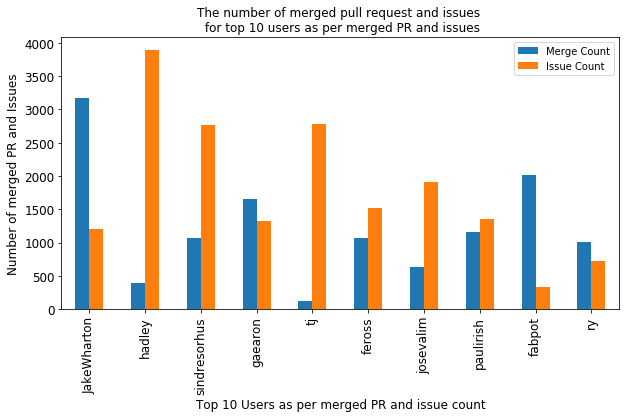

In [19]:
ax = sorted_by_merge_issue_df.head(10)[['Merge Count','Issue Count']].plot(kind='bar', title ="The number of merged pull request and issues \n for top 10 users as per merged PR and issues", figsize=(10, 5), legend=True, fontsize=12, stacked=False)
ax.set_xticklabels(sorted_by_merge_issue_df.head(10)['login'])
ax.set_xlabel("Top 10 Users as per merged PR and issue count", fontsize=12)
ax.set_ylabel("Number of merged PR and Issues", fontsize=12)
plt.savefig('mergeissuewpr.png', format='png', dpi=600,bbox_inches = 'tight')
plt.show()

In [20]:
a= list(sorted_by_merge_issue_df.login.head(10))

b= list(user_details.login.head(10))

def intersection(a, b): 
    return list(set(a) & set(b)) 

print("Intersection = ", len(intersection(a, b)))

Intersection =  5


In [21]:
sorted_by_merge_issue_df['merge_per'] = round(sorted_by_merge_issue_df['Merge Count']/sorted_by_merge_issue_df['MergedIssue']*100)
sorted_by_merge_issue_df['issue_per'] = round(sorted_by_merge_issue_df['Issue Count']/sorted_by_merge_issue_df['MergedIssue']*100)

## Merge request likelihood for software people

In [26]:
sorted_by_merge_issue_df['likely'] = sorted_by_merge_issue_df['Issue Count'].head(100) < sorted_by_merge_issue_df['Merge Count'].head(100)

In [27]:
sorted_by_merge_issue_df['likely'].value_counts()

False    61
True     39
Name: likely, dtype: int64

## Merge request likelihood for social people

In [28]:
user_details['likely'] = user_details['Issue Count'] < user_details['Merge Count']

In [29]:
user_details['likely'].value_counts()

False    61
True     39
Name: likely, dtype: int64

In [31]:
sorted_by_merge_issue_df['likely'] = np.where(sorted_by_merge_issue_df['Merge Ratio'] > user_details['Merge Ratio'], 'True', 'False')

In [32]:
sorted_by_merge_issue_df['likely'].value_counts()

False    54
True     46
Name: likely, dtype: int64